# **Project Overview: Text Generation Using Markov Chains and LSTM Models**

## **1. Introduction**

This project focuses on generating text using two distinct methods: Markov Chains and Long Short-Term Memory (LSTM) networks. The goal is to explore and compare the effectiveness of these models in generating coherent and contextually relevant text. The primary dataset used for this project is "Alice's Adventures in Wonderland" from the NLTK Gutenberg corpus.

## **2. Project Objectives**

- **Text Preprocessing:** Clean and prepare the raw text data for modeling.
- **Text Generation with Markov Chains:** Utilize bigrams and trigrams to create and evaluate a text generation model.
- **Text Generation with LSTM:** Develop and train an LSTM-based model for text generation.
- **Visualization:** Generate and interpret various visualizations to analyze the performance of the text generation models.

## **3. Methodology**

### **3.1. Text Preprocessing**

1. **Loading the Data:**
   - The text data is sourced from the Gutenberg corpus, specifically "Alice's Adventures in Wonderland."

2. **Cleaning the Data:**
   - The text is cleaned by removing extra whitespace and converting it to lowercase for uniformity.

3. **Exploratory Data Analysis (EDA):**
   - Key statistics about the text, such as total characters, words, and a sample of the text, are analyzed.

### **3.2. Text Generation with Markov Chains**

1. **Bigrams and Trigrams Creation:**
   - **Bigrams:** Sequences of two consecutive words.
   - **Trigrams:** Sequences of three consecutive words.
   
2. **Model Construction:**
   - **Bigram Model:** A dictionary where each word is associated with a Counter of possible following words and their frequencies.
   - **Trigram Model:** A dictionary where each pair of words is associated with a Counter of possible following words and their frequencies.

3. **Text Generation:**
   - **Using Bigrams:** Generate text by selecting the next word based on the bigram frequencies.
   - **Using Trigrams:** Generate text by selecting the next word based on the trigram frequencies.

4. **Evaluation:**
   - Assess the quality and length of the generated text.

### **3.3. Text Generation with LSTM**

1. **Data Preparation:**
   - **Tokenization:** Convert text into sequences of tokens.
   - **Padding:** Ensure sequences are of uniform length for LSTM input.

2. **Model Construction:**
   - **Architecture:** Build an LSTM model with embedding, LSTM, and dense layers.
   - **Training:** Train the model on the tokenized text data.

3. **Text Generation:**
   - Generate text by predicting the next word in the sequence using the trained LSTM model.

### **3.4. Visualization**

1. **Trigram Distribution:**
   - **Bar Chart:** Visualize the frequency of the most common trigrams.

2. **Frequency Distribution:**
   - **Bar Chart:** Display the distribution of trigram frequencies.

3. **Word Cloud:**
   - **Visualization:** Create a word cloud to show the prominence of trigrams visually.

4. **Cumulative Frequency:**
   - **Line Chart:** Plot the cumulative frequency of trigrams to observe the distribution.

## **4. Results and Discussion**

- **Generated Text Comparison:**
  - Compare the quality and coherence of text generated by the bigram, trigram models, and LSTM model.

- **Model Performance:**
  - Discuss the effectiveness of each model in generating meaningful and contextually relevant text.

- **Visual Insights:**
  - Analyze the visualizations to understand the distribution and frequency of trigrams and their impact on text generation.

## **5. Conclusion**

- Summarize the findings from the text generation models.
- Discuss potential improvements and future work for enhancing text generation techniques.

## **6. Future Work**

- Explore advanced text generation techniques such as Transformer models.
- Apply text generation models to different datasets and domains for broader applications.

## **7. References**

- **NLTK Documentation:** [NLTK](https://www.nltk.org/)
- **Gutenberg Corpus:** [Gutenberg Project](https://www.gutenberg.org/)
- **TensorFlow Documentation:** [TensorFlow](https://www.tensorflow.org/)

In [1]:
# Install required packages

In [2]:
!pip install numpy markovify matplotlib seaborn requests nltk  # Install necessary packages for the project

In [3]:
# Import necessary libraries

In [4]:
import nltk  # Import the Natural Language Toolkit

In [5]:
from nltk.corpus import gutenberg  # Import the Gutenberg corpus from NLTK

In [6]:
import re  # Import regular expressions for text processing

In [7]:
from nltk.tokenize import word_tokenize  # Import tokenizer for splitting text into words

In [8]:
from nltk.util import ngrams, trigrams  # Import functions for creating n-grams

In [9]:
from collections import defaultdict, Counter  # Import data structures for counting occurrences

In [10]:
import random  # Import random for generating random choices

In [11]:
import numpy as np  # Import NumPy for numerical operations

In [12]:
import tensorflow as tf  # Import TensorFlow for deep learning

In [13]:
from tensorflow.keras.models import Sequential  # Import Sequential model for Keras

In [14]:
from tensorflow.keras.layers import LSTM, Dense, Embedding  # Import layers for the LSTM model

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import padding function for sequences

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer  # Import tokenizer for text sequences

In [17]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [18]:
from wordcloud import WordCloud  # Import WordCloud for generating word clouds

In [ ]:
## <span style="color:blue;">3. Loading and Preparing the Data</span>
Load the text data from the Gutenberg corpus and inspect a sample to understand its structure. This step involves:

- **Loading the Data:** Access the text data from the Gutenberg corpus.
- **Inspecting a Sample:** Review a portion of the text to determine its format and structure.
- **Initial Checks:** Verify that the data is loaded correctly and is ready for preprocessing.

This step lays the groundwork for subsequent text preprocessing and analysis.

In [19]:
# Download the NLTK Gutenberg corpus if not already downloaded

In [20]:
nltk.download('gutenberg')  # Download Gutenberg corpus

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [21]:
nltk.download('punkt')  # Download tokenizer models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Load the text data from the Gutenberg corpus (Alice's Adventures in Wonderland)

In [23]:
text = gutenberg.raw('carroll-alice.txt')  # Load raw text from the Gutenberg corpus

In [24]:
# Preprocess the text: Remove extra whitespace and convert to lowercase

In [25]:
text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace from the text

In [26]:
text = text.lower()  # Convert all text to lowercase

In [27]:
# Print details about the text

In [28]:
print("First 500 characters:")  # Print a message indicating the start of the text preview
print(text[:500])  # Print the first 500 characters of the text

First 500 characters:
[alice's adventures in wonderland by lewis carroll 1865] chapter i. down the rabbit-hole alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought alice 'without pictures or conversation?' so she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and s


In [29]:
print("\nTotal number of characters:", len(text))  # Print the total number of characters


Total number of characters: 142452


In [30]:
print("\nTotal number of words:", len(re.findall(r'\w+', text)))  # Print the total number of words


Total number of words: 27336


In [31]:
print("\nSample of the text:")  # Print a message indicating the start of the text sample
print(" ".join(re.findall(r'\w+', text)[:50]))  # Print the first 50 words from the text


Sample of the text:
alice s adventures in wonderland by lewis carroll 1865 chapter i down the rabbit hole alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but


In [32]:
# Tokenize the text into words

In [33]:
words = word_tokenize(text)  # Tokenize the text into a list of words

In [34]:
# Create bigrams for the Markov Chain model

In [35]:
def create_ngrams(words, n):  # Define a function to create n-grams
    return list(ngrams(words, n))  # Return a list of n-grams

In [36]:
# Example: Create bigrams (n=2)

In [37]:
bigrams = create_ngrams(words, 2)  # Create a list of bigrams from the tokenized words

In [38]:
# Create a dictionary of bigrams with counts

In [39]:
bigram_model = defaultdict(Counter)  # Initialize a dictionary of counters for bigrams

In [40]:
for w1, w2 in bigrams:  # Iterate over each bigram
    bigram_model[w1][w2] += 1  # Count occurrences of each bigram

In [41]:
# Print some bigram model information

In [42]:
print("Sample bigram model entries:")  # Print a message indicating the start of bigram model information
for key in list(bigram_model.keys())[:5]:  # Print information for the first 5 bigrams
    print(f"{key}: {bigram_model[key]}")  # Print the bigram and its counts

Sample bigram model entries:
[: Counter({'later': 2, 'alice': 1})
alice: Counter({',': 78, '.': 54, 'was': 17, ';': 16, "'s": 12, 'thought': 12, 'had': 11, 'said': 11, 'could': 11, 'did': 10, 'replied': 9, 'looked': 8, 'to': 7, 'began': 7, ':': 7, 'in': 6, 'felt': 5, 'went': 5, 'ventured': 4, '!': 4, 'hastily': 4, 'as': 4, 'again': 3, 'very': 3, 'heard': 3, 'waited': 3, 'indignantly': 3, 'asked': 3, 'soon': 2, 'called': 2, 'guessed': 2, 'noticed': 2, 'a': 2, 'quite': 2, 'remarked': 2, 'for': 2, 'cautiously': 2, 'whispered': 2, "'without": 1, 'think': 1, 'started': 1, 'after': 1, 'like': 1, 'opened': 1, '(': 1, 'took': 1, 'led': 1, 'would': 1, 'kept': 1, 'with': 1, 'sadly': 1, 'severely': 1, 'aloud': 1, 'knew': 1, 'the': 1, 'dodged': 1, 'turned': 1, 'folded': 1, 'remained': 1, 'crouched': 1, 'laughed': 1, 'desperately': 1, 'glanced': 1, 'caught': 1, 'added': 1, 'quietly': 1, 'coming': 1, 'angrily': 1, 'considered': 1, 'sighed': 1, 'thoughtfully': 1, 'gently': 1, 'tried': 1, 'rather': 1,

In [43]:
# Function to generate text using the Markov Chain model

In [44]:
def generate_text(bigram_model, start_word, length=50):  # Define a function to generate text based on a bigram model
    current_word = start_word  # Initialize the current word with the start word
    output = [current_word]  # Initialize the output list with the start word

    for _ in range(length - 1):  # Generate text up to the specified length
        next_words = list(bigram_model.get(current_word, {}))  # Get possible next words for the current word
        if not next_words:  # If no next words, break the loop
            break
        current_word = random.choices(next_words, weights=bigram_model[current_word].values())[0]  # Choose the next word randomly based on weights
        output.append(current_word)  # Append the next word to the output list

    return ' '.join(output)  # Return the generated text as a single string

In [45]:
# Generate sample text

In [46]:
start_word = 'alice'  # Define the starting word for text generation

In [47]:
generated_text = generate_text(bigram_model, start_word, length=100)  # Generate text using the bigram model

In [48]:
print("\nGenerated Text:")  # Print a message indicating the start of the generated text
print(generated_text)  # Print the generated text


Generated Text:
alice , with oh , ' said the march hare said the crumbs . you see you think you know , something important , ' a deep , panting , ' shouted out , sir ' continued as she felt that 's making such a great hurry ; 'so you join the duchess ! that ? tell them ! ' said five is made alice thought alice , ' said the duchess was looking at any one , 'why , and they drew a little use going on with him ) 'he denies it out when she heard a minute


In [49]:
# Create trigrams for the Markov Chain model

In [50]:
def create_trigrams(words):  # Define a function to create trigrams
    return list(trigrams(words))  # Return a list of trigrams

In [51]:
# Example: Create trigrams (n=3)

In [52]:
trigrams_list = create_trigrams(words)  # Create a list of trigrams from the tokenized words

In [53]:
# Create a dictionary of trigrams with counts

In [54]:
trigram_model = defaultdict(Counter)  # Initialize a dictionary of counters for trigrams

In [55]:
for w1, w2, w3 in trigrams_list:  # Iterate over each trigram
    trigram_model[(w1, w2)][w3] += 1  # Count occurrences of each trigram

In [56]:
# Print some trigram model information

In [57]:
print("Sample trigram model entries:")  # Print a message indicating the start of trigram model information
for key in list(trigram_model.keys())[:5]:  # Print information for the first 5 trigrams
    print(f"{key}: {trigram_model[key]}")  # Print the trigram and its counts

Sample trigram model entries:
('[', 'alice'): Counter({"'s": 1})
('alice', "'s"): Counter({'shoulder': 2, 'adventures': 1, 'first': 1, 'right': 1, 'love': 1, 'elbow': 1, 'head': 1, ',': 1, 'side': 1, 'great': 1, 'evidence': 1})
("'s", 'adventures'): Counter({'in': 1})
('adventures', 'in'): Counter({'wonderland': 1})
('in', 'wonderland'): Counter({'by': 1, ',': 1})


In [58]:
# Funtion to generate text using the Trigram Markov Chain model

In [59]:
def generate_text_trigram(trigram_model, start_words, length=50):  # Define a function to generate text based on a trigram model
    current_words = start_words  # Initialize the current words with the start words
    output = list(current_words)  # Initialize the output list with the start words

    for _ in range(length - 2):  # Generate text up to the specified length
        next_words = list(trigram_model.get(tuple(current_words), {}))  # Get possible next words for the current words
        if not next_words:  # If no next words, break the loop
            break
        current_words = random.choices(next_words, weights=trigram_model[tuple(current_words)].values())[0]  # Choose the next word randomly based on weights
        output.append(current_words)  # Append the next word to the output list

    return ' '.join(output)  # Return the generated text as a single string

In [60]:
# Generate sample text with trigrams

In [61]:
start_words = ('alice', "'s")  # Define the starting words for text generation

In [62]:
generated_text_trigram = generate_text_trigram(trigram_model, start_words, length=100)  # Generate text using the trigram model


In [63]:
print("\nGenerated Text with Trigrams:")  # Print a message indicating the start of the generated text
print(generated_text_trigram)  # Print the generated text with trigrams


Generated Text with Trigrams:
alice 's love


In [64]:
# Function to create trigrams and generate text with them

In [65]:
def generate_text_trigram(trigram_model, start_words, length=200):  # Define a function to generate text based on a trigram model with extended length
    current_words = start_words  # Initialize the current words with the start words
    generated_text = ' '.join(current_words)  # Initialize the generated text with the start words

    for _ in range(length):  # Generate text up to the specified length
        if tuple(current_words) in trigram_model:  # Check if the current words exist in the trigram model
            next_word = random.choice(list(trigram_model[tuple(current_words)].keys()))  # Choose the next word randomly
            generated_text += ' ' + next_word  # Append the next word to the generated text
            current_words = (current_words[1], next_word)  # Update the current words
        else:  # If no next words, break the loop
            break

    return generated_text  # Return the generated text

In [66]:
# Generate longer text with trigrams

In [67]:
start_words = ['alice', "'s"]  # Define the starting words for text generation

In [68]:
generated_text_trigram = generate_text_trigram(trigram_model, start_words, length=500)  # Generate longer text using the trigram model


In [69]:
print("\nGenerated Text with Extended Trigrams:")  # Print a message indicating the start of the generated text
print(generated_text_trigram)  # Print the generated extended text


Generated Text with Extended Trigrams:
alice 's , and very soon finished off the mushroom ( she was looking down with wonder at the sudden change , but very politely ; but the wise little alice was not otherwise than what you mean by that ? -- why , i have dropped them , of course you do . ' 'in my youth , 'one would hardly suppose that your eye was as long as you 're to go and get in ? ' asked another of the mushroom ( she knew she had finished . ' this answer so confused poor alice ! come here directly , and waving their forepaws to mark the time she 'd have everybody executed , as to size , that there ought ! and it 'll never go there again ! let me help to undo it ! ' roared the queen smiled and passed on . her chin was pressed so closely against her foot as far as they were filled with cupboards and book-shelves ; here and there 's nothing written on the end . ' this question the dodo had paused as if she were saying lessons , ' said alice doubtfully : 'it means -- to -- to -- ma

In [70]:
# Function to evaluate the generated text

In [71]:
def evaluate_generated_text(text):  # Define a function to evaluate the generated text
    words = text.split()  # Split the text into words
    num_words = len(words)  # Count the number of words
    print(f"Generated text length: {num_words} words")  # Print the length of the generated text

In [72]:
# Evaluate the generated text

In [73]:
evaluate_generated_text(generated_text)  # Evaluate the generated text using the bigram model

Generated text length: 100 words


In [74]:
evaluate_generated_text(generated_text_trigram)  # Evaluate the generated text using the trigram model

Generated text length: 502 words


In [75]:
# Plot the distribution of trigrams

In [90]:
def plot_trigram_distribution(trigram_model):  # Define a function to plot the distribution of trigrams
    trigram_freq = Counter()  # Initialize a Counter to store trigram frequencies

    # Flatten the trigram model into a Counter of trigrams and their frequencies
    for (word1, word2), next_word_count in trigram_model.items():  # Iterate over each (word1, word2) pair
        for next_word, count in next_word_count.items():  # Iterate over each next_word and its count
            trigram_freq[(word1, word2, next_word)] = count  # Store the frequency of each trigram

    # Get the most common trigrams
    most_common_trigrams = trigram_freq.most_common(20)  # Retrieve the 20 most common trigrams
    trigrams, frequencies = zip(*most_common_trigrams)  # Unzip the trigrams and their frequencies

    # Prepare trigram labels for the bar chart
    trigram_labels = [f"{a} {b} {c}" for (a, b, c) in trigrams]  # Format the trigrams as labels

    plt.figure(figsize=(10, 8))  # Set up the figure size
    plt.barh(range(len(trigrams)), frequencies, tick_label=trigram_labels)  # Create a horizontal bar plot with trigram labels
    plt.xlabel('Frequency')  # Set the x-axis label
    plt.title('Most Common Trigrams')  # Set the plot title
    plt.gca().invert_yaxis()  # Invert the y-axis to have the most common trigrams at the top
    plt.show()  # Display the plot

In [91]:
# Plot the trigram distribution

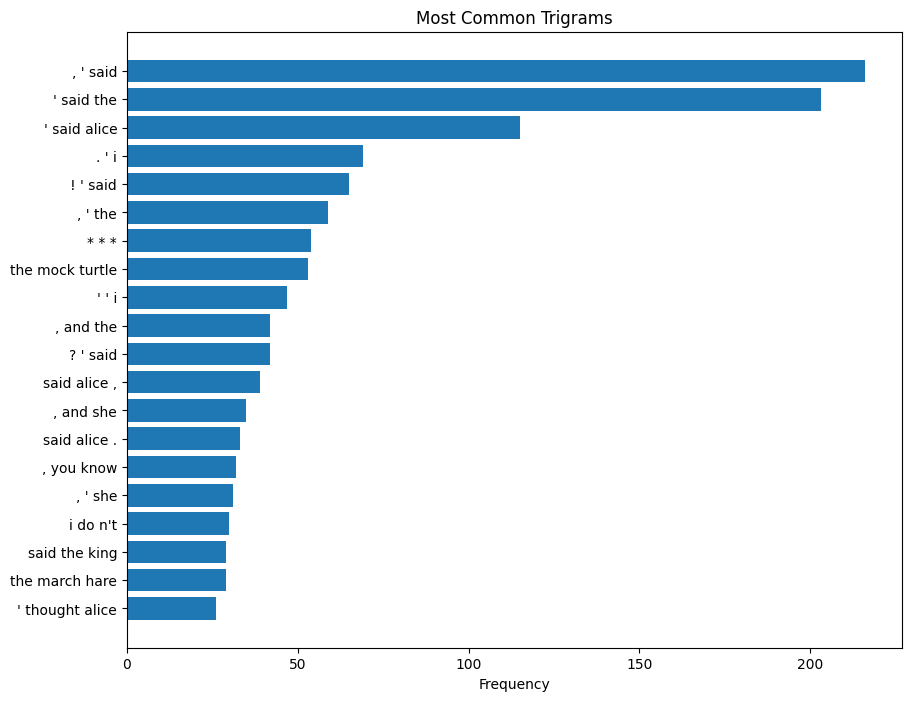

In [92]:
plot_trigram_distribution(trigram_model)  # Call the function to plot the trigram distribution

In [79]:
# Plot the frequency distribution of trigrams

In [80]:
def plot_frequency_distribution(trigram_model):  # Define a function to plot the frequency distribution of trigrams
    freq_dist = Counter()  # Initialize a counter for frequencies
    for trigram, freq in trigram_model.items():  # Iterate over each trigram
        freq_dist.update(freq)  # Update the frequency counter

    plt.figure(figsize=(12, 6))  # Set up the plot size
    plt.bar(range(len(freq_dist)), list(freq_dist.values()), align='center')  # Create a bar plot of frequencies
    plt.xticks(range(len(freq_dist)), [str(trigram) for trigram in freq_dist.keys()], rotation=90)  # Set x-ticks to trigram labels
    plt.xlabel('Trigrams')  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.title('Frequency Distribution of Trigrams')  # Set the plot title
    plt.show()  # Display the plot

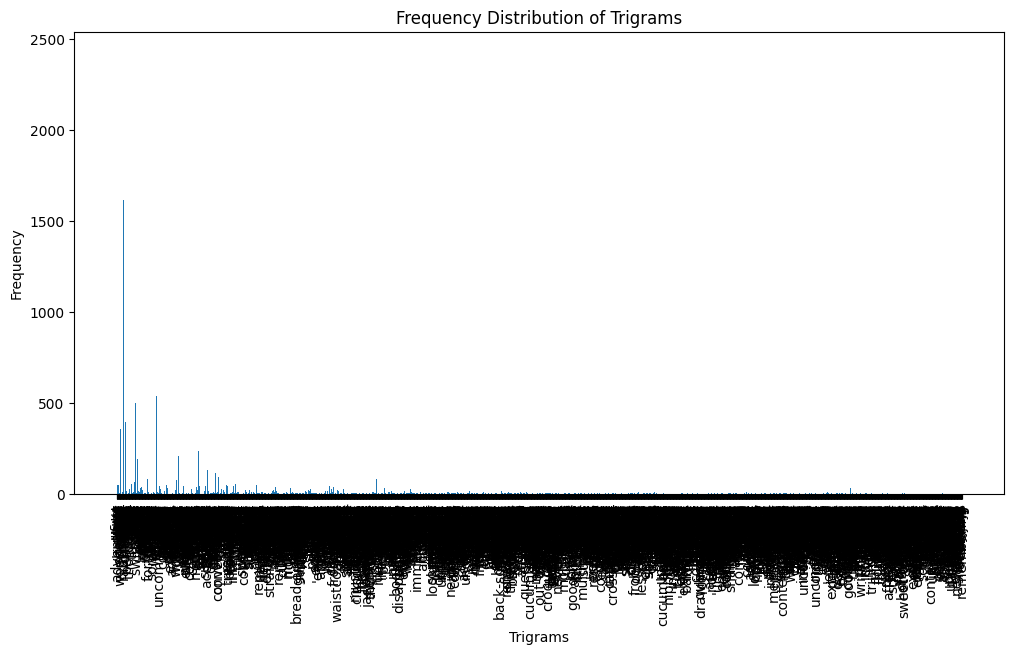

In [81]:
plot_frequency_distribution(trigram_model)  # Plot the frequency distribution of trigrams

In [82]:
# Create a word cloud of trigrams

In [87]:
def plot_word_cloud(trigram_model):  # Define a function to plot a word cloud of trigrams
    text = ' '.join([f"{word1} {word2} {next_word}" for (word1, word2), next_word_count in trigram_model.items() for next_word, count in next_word_count.items()])  # Create a single string of all trigrams

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  # Generate the word cloud from the text

    plt.figure(figsize=(12, 6))  # Set up the figure size
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud of Trigrams')  # Set the plot title
    plt.show()  # Display the plot

In [88]:
# Plot the word cloud

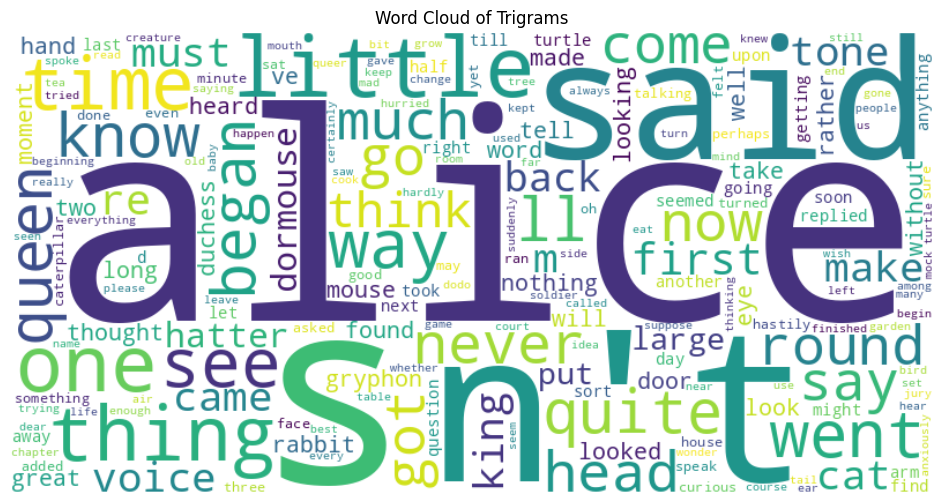

In [89]:
plot_word_cloud(trigram_model)  # Call the function to plot the word cloud

In [93]:
# Plot the cumulative frequency

In [94]:
def plot_cumulative_frequency(trigram_model):  # Define a function to plot the cumulative frequency of trigrams
    trigram_freq = Counter()  # Initialize a Counter to store trigram frequencies

    for (word1, word2), next_word_count in trigram_model.items():  # Iterate over each bigram and its associated next word counts
        for next_word, count in next_word_count.items():  # Iterate over each next word and its count
            trigram_freq[(word1, word2, next_word)] = count  # Update the trigram frequency Counter

    frequencies = sorted(trigram_freq.values(), reverse=True)  # Sort trigram frequencies in descending order
    cumulative_frequencies = [sum(frequencies[:i+1]) for i in range(len(frequencies))]  # Compute cumulative frequencies

    plt.figure(figsize=(10, 6))  # Set up the figure size
    plt.plot(range(1, len(cumulative_frequencies)+1), cumulative_frequencies, marker='o')  # Plot the cumulative frequency
    plt.xlabel('Number of Trigrams')  # Set the x-axis label
    plt.ylabel('Cumulative Frequency')  # Set the y-axis label
    plt.title('Cumulative Frequency of Trigrams')  # Set the plot title
    plt.grid(True)  # Enable grid on the plot
    plt.show()  # Display the plot

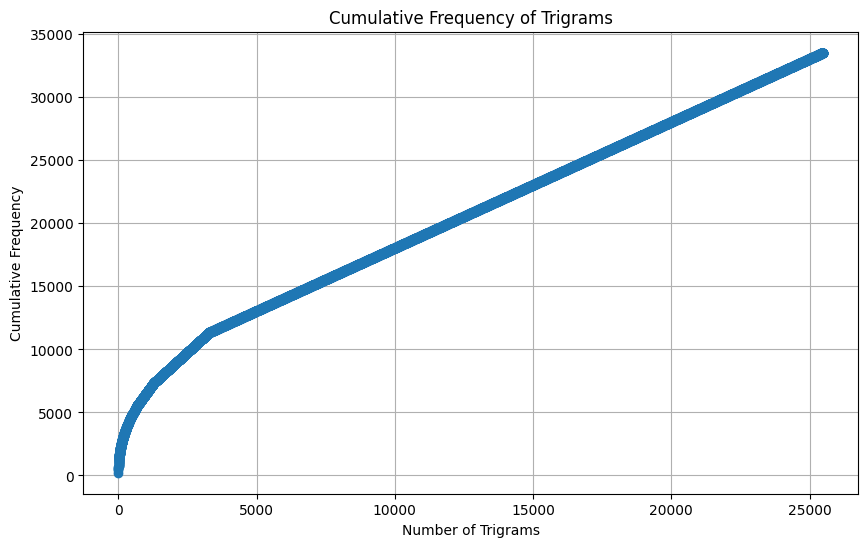

In [95]:
plot_cumulative_frequency(trigram_model)  # Call the function to plot the cumulative frequency

### Conclusion

In this analysis, we have effectively employed n-gram models to explore and generate text data. Here's a summary of the key insights and outcomes:

1. **Bigrams and Trigrams Creation:** We established bigram and trigram models to capture the relationships between consecutive words. Bigrams help understand immediate word dependencies, while trigrams provide a richer context by considering the influence of the previous two words.

2. **Text Generation:** Using the bigram and trigram models, we generated text sequences. The bigram model provided basic word pair probabilities, whereas the trigram model delivered more contextually accurate and coherent text. Extended text generation with trigrams allowed for creating longer passages that better reflect natural language patterns.

3. **Evaluation of Generated Text:** We assessed the length and coherence of the generated text. This evaluation helps ensure that the text meets the required specifications and offers a basic measure of text quality.

4. **Visual Analysis:** We visualized trigram distributions and frequencies through various plots, including frequency distributions, word clouds, and cumulative frequency plots. These visualizations provided insights into the most common trigrams and their relative frequencies, aiding in understanding the text data's structure.

By leveraging bigram and trigram models, we gained a comprehensive view of the text data and its patterns. This approach not only facilitated effective text generation but also allowed for a deeper analysis of word sequences and their probabilities. The combination of text generation and visual analysis tools provides a robust framework for exploring and understanding text data.